In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from scipy import signal
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import sys
sys.path.append("..")

In [3]:
import warnings
warnings.filterwarnings('ignore') # 計算警告を非表示

In [4]:
from appContainer.app.module.sarima import *

In [5]:
# 変数群
csv_file = "../sample_data/AirPassengers.csv"
index_col = "Month"
target_col = "#Passengers"
pred_begin = "1960-01"
pred_end = "1963-1"

output_fig_dir = "./output_fig"
if not os.path.isdir(output_fig_dir):
    os.mkdir(output_fig_dir)

# 計算速度を測定

In [6]:
%%time
ts = read_data(csv_file,
            index_col,
            target_col
            )

sarimax = fit_sarima(ts,
                    sp = 1,
                    sd = 1,
                    sq = 1,
                    missing = False
                    )

_, _ = output_results(sarimax,
                    pred_begin,
                    pred_end,
                    ts,
                    csv_file,
                    index_col,
                    target_col,
                    output_fig_dir,
                    missing = False
                    )

CPU times: user 5.61 s, sys: 147 ms, total: 5.75 s
Wall time: 4.89 s


# 個別に速度を調べる

In [7]:
%%time
ts = read_data(csv_file,
            index_col,
            target_col
            )

CPU times: user 7.74 ms, sys: 2.77 ms, total: 10.5 ms
Wall time: 18 ms


In [8]:
%%time
sarimax = fit_sarima(ts,
                    sp = 1,
                    sd = 1,
                    sq = 1,
                    missing = False
                    )

CPU times: user 4.62 s, sys: 89.9 ms, total: 4.71 s
Wall time: 3.77 s


In [9]:
%%time
_, _ = output_results(sarimax,
                    pred_begin,
                    pred_end,
                    ts,
                    csv_file,
                    index_col,
                    target_col,
                    output_fig_dir,
                    missing = False
                    )

CPU times: user 455 ms, sys: 19.8 ms, total: 475 ms
Wall time: 589 ms


# 欠損を含む時系列

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1045fb7b8&gt;

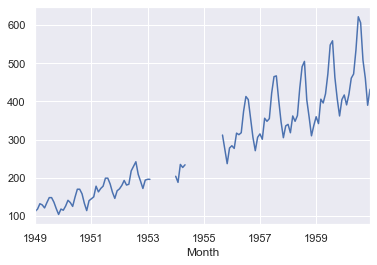

In [10]:
ts_missing = ts.copy()
ts_missing[50:60] = np.nan
ts_missing[65:80] = np.nan
ts_missing.plot()

In [11]:
%%time
sarimax = fit_sarima(ts_missing,
                    sp = 1,
                    sd = 1,
                    sq = 1,
                    missing = True
                    )

_, _ = output_results(sarimax,
                    pred_begin,
                    pred_end,
                    ts_missing,
                    csv_file,
                    index_col,
                    target_col,
                    output_fig_dir,
                    missing = True
                    )

CPU times: user 6.07 s, sys: 126 ms, total: 6.19 s
Wall time: 5.79 s
